# BUSINESS UNDERSTANDING
## Introduction

The real estate market is a dynamic and complex field influenced by numerous factors that affect property values.In the market, homeowners and stakeholders often seek ways to maximize property values, whether preparing to sell or enhancing their investments. Accurately predicting house prices is crucial for making informed decisions. This project aims to provide insights on home valuation and how various renovations can increase their estimated value. By leveraging data on homes in King County, we aim to help homeowners make informed decisions regarding their property.

## Problem Statement

Homeowners and real estate agents often face the challenge of accurately predicting home values and identifying which renovations will yield the highest return on investment. Inaccurate valuations can affect home sales and lead to significant losses for both buyers and sellers. Uninformed renovation decisions can result in unnecessary expenditures without a corresponding increase in property value. For a real estate agency that helps homeowners buy and sell homes, providing accurate home valuations and precise advice on effective renovations is crucial. Traditional methods often fail to capture the complexity and interactions between different factors, leading to less reliable predictions. This project addresses the problem of developing a reliable and accurate predictive model for house prices using linear regression, incorporating a comprehensive set of independent variables to improve prediction accuracy.

## Objectives

1. **Develop a model that accurately predicts the value of a house based on its features.**
   - Investigate the most important features in homes to create an accurate model for estimating home value.
   
2. **Explore and quantify the relationship between renovations and property value and refine the model based on the results.**
   - Determine whether renovations affect home prices. If a relationship exists, quantify it and refine the model to improve accuracy.
   
3. **Offer tailored recommendations to homeowners based on their property characteristics and market conditions.**
   - Provide homeowners with accurate property valuations and advise on whether renovations would be a worthwhile investment if they intend to sell.


By analyzing housing data, this project will develop a predictive model to guide homeowners in making strategic renovation investments that enhance property value. This model will also support stakeholders in urban development by providing a reliable tool for estimating housing prices.


# DATA UNDERSTANDING

In [82]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [83]:
df = pd.read_csv("data/kc_house_data.csv") # Read the data stored in kc_house_data.csv
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [84]:
df.columns # Accesses columns in our dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# EDA & DATA CLEANING

In [85]:
df.shape

(21597, 21)

- Number of Rows (Observations): There are 21597 rows in the DataFrame.
- Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [87]:
df.columns #check column names


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [88]:
df.describe() # Data Description of Numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- We drop  duplicated rows and columns that are not that relevant in helping us come up with the models

In [89]:
#drop duplicates
df = df.drop_duplicates(subset= ['id'])

In [90]:
df = df.drop(['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [91]:
df.isna().sum() #Check for columns with null values

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2353
condition          0
grade              0
yr_built           0
yr_renovated    3804
dtype: int64

In [92]:
#percentage of nans

percentage_nan = 3804/21420
percentage_nan

0.17759103641456583

filling nans with zeros, the assumption being that they have no water fronts and/or they have not been renovated, This because the percentage of nans for yr_renovated is almost  a significant 20% and may affect our analysis if we drop

In [93]:
#filling nans with zero
df = df.fillna(0.0)

Rechecking for null values

In [94]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

next we convert waterfront and yr_renovated to boolean values, and give them suitable names

In [95]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df['waterfront'] = df['waterfront'].apply(lambda x: x > 0)
# Replace values in column 'yr_renovated' with booleans based on a condition
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x > 0)
df = df.rename(columns={'waterfront': 'has_waterfront', 'yr_renovated': 'is_renovated'})

In [96]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,condition,grade,yr_built,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,False,3,7,1955,False
1,538000.0,3,2.25,2570,7242,2.0,False,3,7,1951,True
2,180000.0,2,1.00,770,10000,1.0,False,3,6,1933,False
3,604000.0,4,3.00,1960,5000,1.0,False,5,7,1965,False
4,510000.0,3,2.00,1680,8080,1.0,False,3,8,1987,False


- Next replace yr_built with age

In [97]:
df['age'] = 2024 - df['yr_built']
df = df.drop(columns= ['yr_built'])


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21420 non-null  float64
 1   bedrooms        21420 non-null  int64  
 2   bathrooms       21420 non-null  float64
 3   sqft_living     21420 non-null  int64  
 4   sqft_lot        21420 non-null  int64  
 5   floors          21420 non-null  float64
 6   has_waterfront  21420 non-null  bool   
 7   condition       21420 non-null  int64  
 8   grade           21420 non-null  int64  
 9   is_renovated    21420 non-null  bool   
 10  age             21420 non-null  int64  
dtypes: bool(2), float64(3), int64(6)
memory usage: 1.7 MB


# Feature Selection

## Pair plot

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


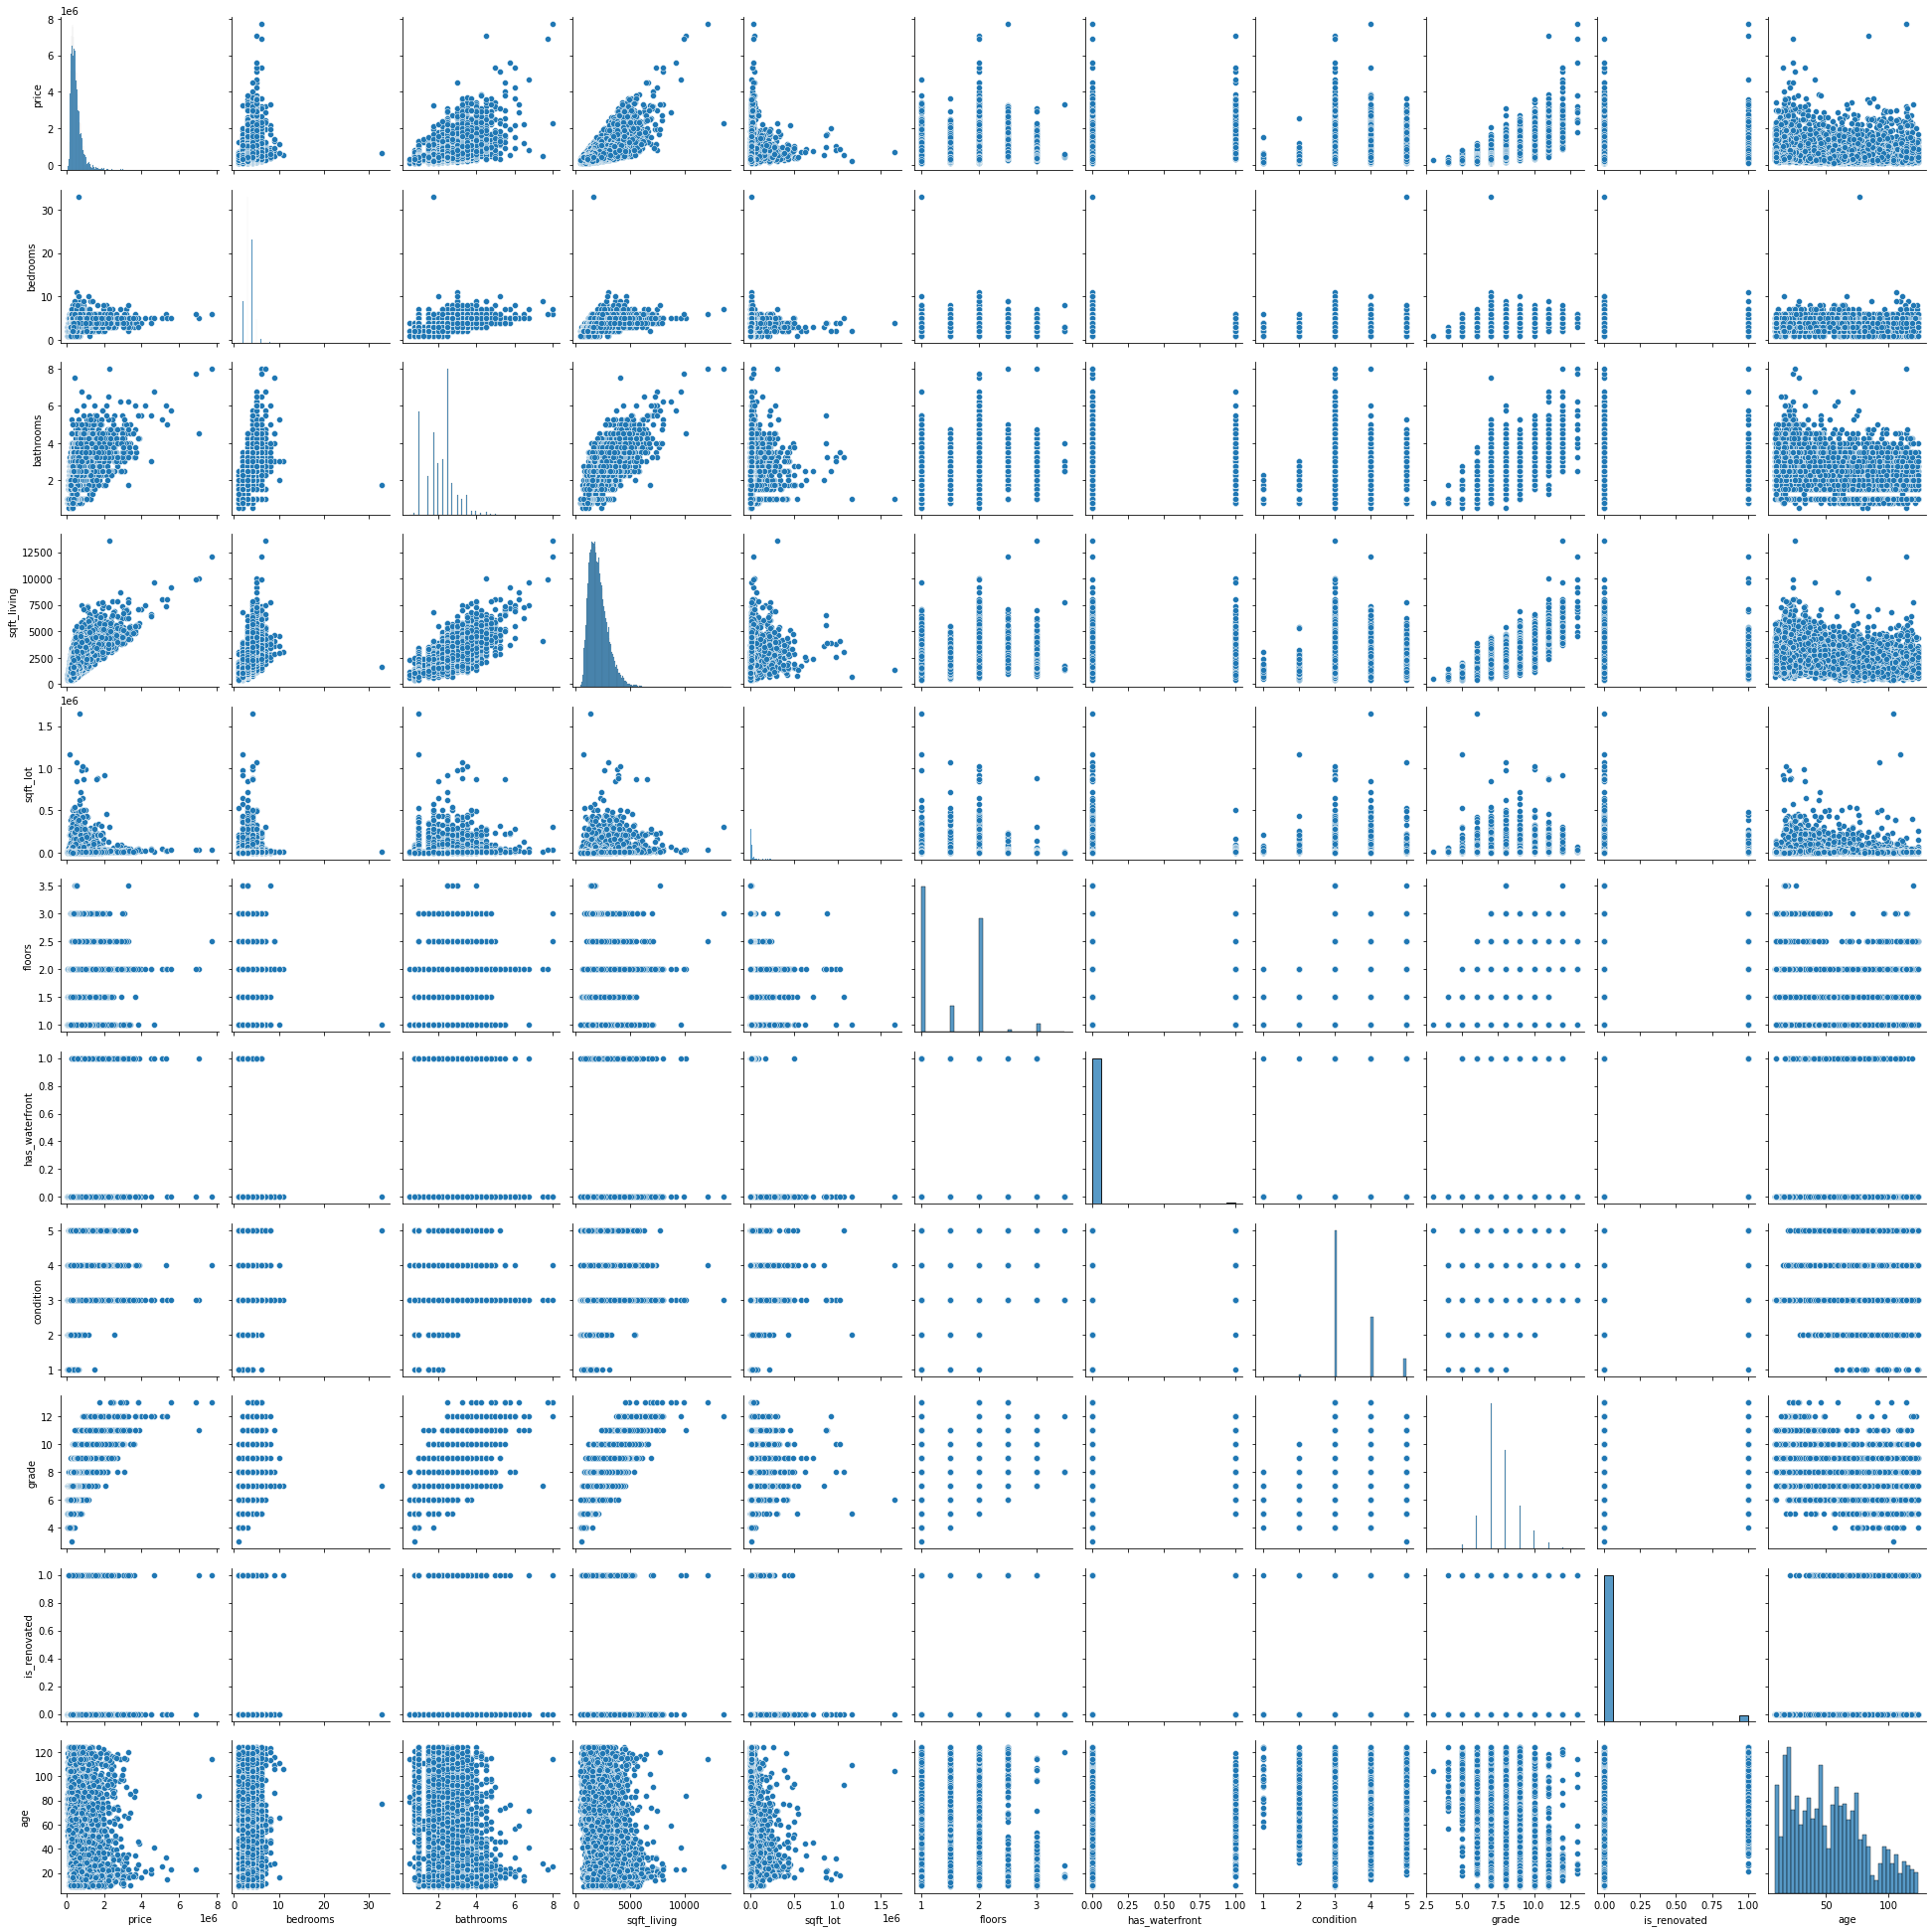

In [99]:
sns.pairplot(data=df)

## Heatmap

<AxesSubplot:>

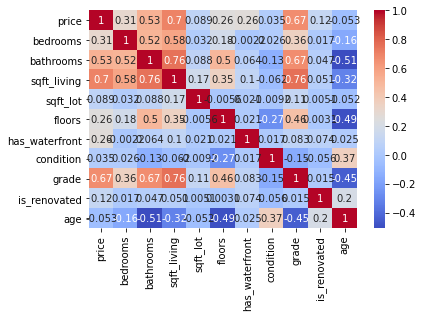

In [100]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

## Correlation matrix

In [101]:
df.corr() # Checked how diifferent independent variables relate to price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,condition,grade,is_renovated,age
price,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.264898,0.034779,0.668020,0.118179,-0.052906
bedrooms,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.025893,0.357988,0.017204,-0.155241
bathrooms,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,-0.129362,0.665587,0.047259,-0.506252
sqft_living,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.050623,-0.316646
sqft_lot,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.005105,-0.052312
floors,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.003063,-0.488935
has_waterfront,0.264898,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,0.074429,0.024842
condition,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.055836,0.365129
grade,0.668020,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.015385,-0.446235
is_renovated,0.118179,0.017204,0.047259,0.050623,0.005105,0.003063,0.074429,-0.055836,0.015385,1.000000,0.203430


- The correlation between price and bedrooms has a coefficient of 0.309453, indicating a moderate positive relationship. As the number of bedrooms increases, the price of the house tends to increase, but the relationship is not very strong.
- The correlation between price and bathrooms has a coefficient of 0.526229, indicating a moderate to strong positive relationship. More bathrooms are associated with higher house prices.
- The correlation between price and Sqft_living has a coefficient of 0.701875, indicating a strong positive relationship. Houses with larger living areas (square footage) tend to be more expensive.
- The correlation between price and sqft_lot has a coefficient of 0.089111, indicating a very weak positive relationship. The size of the lot has little impact on the house price.
- The correlation between price and floors has a coefficient of 0.256286, indicating a weak to moderate positive relationship. More floors are somewhat associated with higher house prices.
- The correlation between price and waterfront has a coefficient of 0.264898, indicating a weak to moderate positive relationship. Houses located on the waterfront tend to be more expensive.
- The correlation between price and condition has a coefficient of 0.034779, indicating an almost negligible positive relationship. The condition of the house has little to no impact on the price.
- The correlation between price and grade has a coefficient of 0.668020, indicating a strong positive relationship. Higher-grade houses (quality of construction and design) tend to be more expensive.
- The correlation between price and is_renovated has a coefficient of 0.118179, indicating a very weak positive relationship. The year the house was built has little impact on the house price.
- The correlation between price and age has a coefficient of 	-0.052906	, indicating a very weak negative relationship. The year the house was built has little impact on the house price.

## Check for any outliers

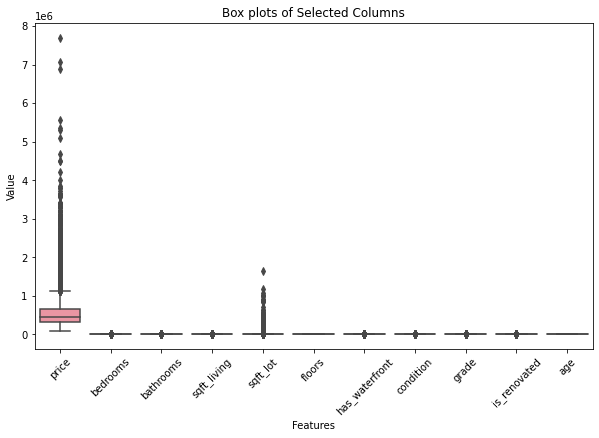

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

from this boxplot, outliers are present in every column apart from the age, and floors column.

Select numeric columns for outlier detection

In [103]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'has_waterfront', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

In [104]:
df_selected_outliers = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                           'condition', 'grade',  'age']]
# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

In [105]:
# droping all rows with outliers 
df = df.drop(outlier_indices)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16871 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           16871 non-null  float64
 1   bedrooms        16871 non-null  int64  
 2   bathrooms       16871 non-null  float64
 3   sqft_living     16871 non-null  int64  
 4   sqft_lot        16871 non-null  int64  
 5   floors          16871 non-null  float64
 6   has_waterfront  16871 non-null  bool   
 7   condition       16871 non-null  int64  
 8   grade           16871 non-null  int64  
 9   is_renovated    16871 non-null  bool   
 10  age             16871 non-null  int64  
dtypes: bool(2), float64(3), int64(6)
memory usage: 1.3 MB


### We shall test the above features practically to create the most accurate model, leveraging on the information from the correlation matrix. Priority features will be those that have a strong correlation with the price

# ANALYSIS

## Analysis 1: Linear Regression Model for Prediction of Housing Prices


##### Investigation of the most important features in homes to create an accurate model for estimating home value.
##### From the correlation matrix above: 
##### Top Predictors - sqft_living,grade,  bathrooms, bedrooms, has_waterfront,floors,is_renovated, sqft_lot,age,condition

#### A.Simple Linear Regression Model

- First, we shall create a model with the top predictor,sqft_living,  and progressively add other predictors while evaluating the performance of our model

##### Data Preparation and Modeling

In [107]:
#Data Preparations

x_model1 = df['sqft_living']
y_model1= df['price']

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model1,y_model1,test_size=0.2,random_state=42)

# Reshape the arrays to 2D
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

#Modeling
model1 = LinearRegression()
model1.fit(x_train,y_train)

#prediction
y_pred = model1.predict(x_test)

df_model1= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model1.head()

,true,pred
933,891000.0,529369.691423
13685,249000.0,365624.591374
9084,320000.0,414907.097214
18793,239950.0,387881.206914
12909,275000.0,421266.130225


##### Validation

In [108]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 26794030405.61377
mae 132359.40113636138
R2 0.2885702362408118


In [116]:
#getting coefficients and intercepts
coefficients = model1.coef_
intercept = model1.intercept_
intercept, coefficients

(158956.01849583234, array([158.97582529]))

##### Simple Linear Regression Formula

The formula for predicting the price (y) can be expressed as:
y = β0 + β1 * sqft_living
Where:

- β0 is the intercept
- β1 is the coefficient for sqft_living

Placing the values of the intercept and coefficient, the formula can be expressed as:


y = **158956.01** + **158.97582529** * sqft_living

Explanation...


#### B.Multiple Linear Regression Model

- To improve the performance of our model, we shall add other key features in our simple model and evaluate its performance.
- We shall then create an additional model with the auxiliary features which do not have a very high correlation with the price and evaluate to verifyif our model improves
- The most accurate model across the metrics of errors and Rsquared will be chosen

Using 2 different sets of predictor variables and come up whith 2 different models.

In [109]:
#checking columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'has_waterfront', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

sqft_living,grade,  bathrooms, bedrooms, has_waterfront,floors,is_renovated, sqft_lot,age,condition

In [110]:

x_model2 = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'floors']]
x_model3 = df[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'has_waterfront', 'condition', 'grade', 'is_renovated', 'age']]
y = df['price']


##### I. Model 2( Multiple linear regression model with top 5 predictors)

##### Data Preparation and Modeling

In [111]:

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model2,y,test_size=0.2,random_state=42)


#Modeling
model2 = LinearRegression()
model2.fit(x_train,y_train)

#prediction
y_pred = model2.predict(x_test)

df_model2= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model2.head()

,true,pred
933,891000.0,463706.504852
13685,249000.0,364895.934048
9084,320000.0,462387.350326
18793,239950.0,382406.975132
12909,275000.0,493641.537861


##### Validation

In [112]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 24145228284.901585
mae 123442.51743868375
R2 0.35890070308197386


In [118]:
#getting coefficients and intercepts
coefficients = model2.coef_
intercept = model2.intercept_
intercept, coefficients

(-282120.28743130196,
 array([   125.07886488,  84968.00110316, -24309.70689454, -19933.8569196 ,
         -8018.75276854]))

##### Multiple Linear Regression Formula

The formula for predicting the price (y) can be expressed as:
y = β0 + β1 * sqft_living + β2 * grade + β3 * bathrooms + β4 * bedrooms + β5 * floors 

Where:

- β0 is the intercept
- β1, β2, ..., β5 are the coefficients for each feature

Placing the values of the intercept and coefficient, the formula can be expressed as:



y = **-282120.28743130196** + **125.07886488** * sqft_living + **84968.00110316** * grade - **24309.70689454** * bathrooms
    - **19933.8569196** * bedrooms - **8018.75276854** * floors 

Explanation...

##### II. Model 3( Multiple linear regression model with all predictors)

##### Data Preparation and Modeling

In [113]:

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model3,y,test_size=0.2,random_state=42)


#Modeling
model3 = LinearRegression()
model3.fit(x_train,y_train)

#prediction
y_pred = model3.predict(x_test)

df_model3= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model3.head()

,true,pred
933,891000.0,621966.947667
13685,249000.0,356956.611323
9084,320000.0,450387.777951
18793,239950.0,300804.653278
12909,275000.0,477456.572732


In [114]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 18382927868.24515
mae 105886.92896160924
R2 0.5119001571421757


##### Multiple Linear Regression Formula

The formula for predicting the price (y) can be expressed as:
y = β0 + β1 * sqft_living + β2 * grade + β3 * bathrooms + β4 * bedrooms + β5 * floors 

Where:

- β0 is the intercept
- β1, β2, ..., β5 are the coefficients for each feature

Placing the values of the intercept and coefficient, the formula can be expressed as:



y = **-282120.28743130196** + **125.07886488** * sqft_living + **84968.00110316** * grade - **24309.70689454** * bathrooms
    - **19933.8569196** * bedrooms - **8018.75276854** * floors 

Explanation...